<a href="https://colab.research.google.com/github/Nidhinavi/NLP/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
import nltk

In [4]:
from nltk.corpus import stopwords

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [6]:
import re

In [7]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec,keyedvectors
from gensim.utils import simple_preprocess
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Updated_ML_AI_NLP_Dataset.csv")

In [9]:
df

,Document_ID,Content,Category,Keywords,Word_Count,Character_Count,Sentiment,Unique_Word_Count,Average_Word_Length,Stopword_Count
0,1,Machine learning enables systems to learn from...,Machine Learning,"machine learning, supervised learning, data sc...",14,105,neutral,14,6.571429,2
1,2,NLP techniques such as tokenization and sentim...,Natural Language Processing,"NLP, tokenization, sentiment analysis, text pr...",14,102,neutral,14,6.357143,2
2,3,Deep learning utilizes neural networks to achi...,Deep Learning,"deep learning, neural networks, CNN, RNN, imag...",14,102,neutral,14,6.357143,3
3,4,"AI ethics focuses on fairness, accountability,...",AI Ethics,"AI ethics, fairness, accountability, transpare...",12,101,neutral,12,7.500000,3


In [10]:
data=df[['Content','Keywords']]

In [11]:
data

,Content,Keywords
0,Machine learning enables systems to learn from...,"machine learning, supervised learning, data sc..."
1,NLP techniques such as tokenization and sentim...,"NLP, tokenization, sentiment analysis, text pr..."
2,Deep learning utilizes neural networks to achi...,"deep learning, neural networks, CNN, RNN, imag..."
3,"AI ethics focuses on fairness, accountability,...","AI ethics, fairness, accountability, transpare..."


In [12]:
data['Content']=data['Content'].str.lower()

<ipython-input-12-c4b8d16cab08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Content']=data['Content'].str.lower()


In [13]:
data['Content']

,Content
0,machine learning enables systems to learn from...
1,nlp techniques such as tokenization and sentim...
2,deep learning utilizes neural networks to achi...
3,"ai ethics focuses on fairness, accountability,..."


In [14]:
data_lower=''.join(data['Content'])

In [15]:
data_lower

'machine learning enables systems to learn from data and improve performance without explicit programming.nlp techniques such as tokenization and sentiment analysis are crucial for text-based ai applications.deep learning utilizes neural networks to achieve breakthroughs in image and speech recognition tasks.ai ethics focuses on fairness, accountability, and transparency in automated decision-making systems.'

In [16]:
###Removing special charater
data['Content']=data['Content'].apply(lambda x: re.sub('[^a-zA-Z0-9-]+', " ", str(x)))

<ipython-input-16-b9210ce7604f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Content']=data['Content'].apply(lambda x: re.sub('[^a-zA-Z0-9-]+', " ", str(x)))


In [17]:
df['Content']=df['Content'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))
## Remove the stopswords
df['Content']=df['Content'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url
df['Content']=df['Content'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
## Remove html tags
df['Content']=df['Content'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
## Remove any additional spaces
df['Content']=df['Content'].apply(lambda x: " ".join(x.split()))

In [18]:
def stemming(text):
    obj=PorterStemmer()

    stem_word=[obj.stem(word) for word in text.split()]

    return stem_word

In [19]:
df["Content"]=df["Content"].apply(stemming)

In [20]:
df["Content"][0]

['machin',
 'learn',
 'enabl',
 'system',
 'learn',
 'data',
 'improv',
 'perform',
 'without',
 'explicit',
 'program']

In [21]:
###Lemmatizing
def lemmitizer(text):
    lemmatizing=WordNetLemmatizer()

    lem_word=[lemmatizing.lemmatize(word) for word in text.split()]

    return lem_word

In [22]:
df['Content']=df['Content'].apply(lambda x:lemmitizer(str(x)))

In [23]:
df["Content"][0]

["['machin',",
 "'learn',",
 "'enabl',",
 "'system',",
 "'learn',",
 "'data',",
 "'improv',",
 "'perform',",
 "'without',",
 "'explicit',",
 "'program']"]

In [24]:
import gensim.downloader as api

In [25]:
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [26]:
model['machin']

array([-1.20117188e-01,  2.16674805e-03,  3.39355469e-02, -4.44335938e-02,
       -4.88281250e-02,  2.69775391e-02, -1.01562500e-01,  4.25338745e-04,
       -1.20605469e-01, -7.99560547e-03, -7.03125000e-02, -6.25000000e-02,
       -1.25976562e-01,  2.91748047e-02,  3.97949219e-02,  1.74804688e-01,
        3.00292969e-02,  1.08886719e-01, -2.68554688e-03, -6.25000000e-02,
       -6.80541992e-03, -1.64062500e-01,  1.31835938e-01,  1.00097656e-01,
       -2.31933594e-02,  2.44140625e-03, -9.66796875e-02,  9.03320312e-02,
       -1.78527832e-03, -1.09375000e-01,  5.64575195e-03, -3.51562500e-02,
       -5.05371094e-02, -2.22167969e-02, -6.39648438e-02, -9.76562500e-02,
       -5.88378906e-02,  8.49609375e-02,  2.16064453e-02, -9.71679688e-02,
       -5.22460938e-02, -6.40869141e-04, -4.88281250e-03, -8.12530518e-04,
       -3.22265625e-02,  2.51464844e-02, -1.09863281e-01,  2.07519531e-02,
       -1.25000000e-01, -8.46862793e-04, -2.05078125e-01,  9.42382812e-02,
        1.13281250e-01,  

In [27]:
from nltk.tokenize import word_tokenize,sent_tokenize


In [28]:
row_text=sent_tokenize(data_lower)
print(row_text)

['machine learning enables systems to learn from data and improve performance without explicit programming.nlp techniques such as tokenization and sentiment analysis are crucial for text-based ai applications.deep learning utilizes neural networks to achieve breakthroughs in image and speech recognition tasks.ai ethics focuses on fairness, accountability, and transparency in automated decision-making systems.']


In [29]:
data=[]
for i in row_text:
  data.append(simple_preprocess(i))

print(data)
print(len(data))

[['machine', 'learning', 'enables', 'systems', 'to', 'learn', 'from', 'data', 'and', 'improve', 'performance', 'without', 'explicit', 'programming', 'nlp', 'techniques', 'such', 'as', 'tokenization', 'and', 'sentiment', 'analysis', 'are', 'crucial', 'for', 'text', 'based', 'ai', 'applications', 'deep', 'learning', 'utilizes', 'neural', 'networks', 'to', 'achieve', 'breakthroughs', 'in', 'image', 'and', 'speech', 'recognition', 'tasks', 'ai', 'ethics', 'focuses', 'on', 'fairness', 'accountability', 'and', 'transparency', 'in', 'automated', 'decision', 'making', 'systems']]
1


In [30]:
from gensim.models import Word2Vec,KeyedVectors
import gensim

In [31]:
custom_model=gensim.models.Word2Vec(window=10,min_count=1,vector_size=150)

In [32]:
custom_model.build_vocab(data)

In [33]:
custom_model.corpus_count

1

In [34]:
custom_model.epochs


5

In [35]:
custom_model.corpus_total_words

56

In [36]:
custom_model.train(data,total_examples=custom_model.corpus_count, epochs=5)

(84, 280)

In [37]:
custom_model.wv["machine"]

array([ 3.4068385e-03,  6.6120136e-03, -3.7762285e-03,  5.5845611e-04,
        2.8916579e-03, -1.8364637e-03,  4.2648689e-04,  5.8855559e-03,
        5.1506618e-03, -4.3078288e-03, -2.1352356e-03,  6.1473497e-03,
       -2.1190730e-04, -6.3736849e-03, -4.7915702e-04, -4.5326464e-03,
        6.1444176e-04,  5.4556323e-04, -2.9342782e-03, -3.0604429e-03,
        5.8684028e-03,  3.0562710e-03,  1.7205365e-03,  1.2322898e-03,
        5.4878355e-03, -3.3295779e-03,  4.0726699e-03, -6.5878313e-04,
       -5.1094401e-03, -6.4602559e-03, -1.1193450e-03,  5.4128300e-03,
        1.4739644e-03, -5.9851874e-03,  8.1904104e-04, -2.4173020e-03,
       -2.7038371e-03,  5.4231281e-03,  3.8824561e-03,  2.4244252e-04,
        1.6361756e-03,  5.9986580e-04, -6.6128979e-03,  1.9918294e-03,
        4.7902013e-03,  2.6645483e-03,  1.6441492e-03, -2.3634203e-03,
        1.5569715e-03, -5.0857756e-03,  2.8118056e-03,  1.5968551e-03,
       -2.7553970e-04, -3.9688192e-04,  1.7557103e-03,  1.4830790e-03,
      

In [38]:
custom_model.wv["neural"]

array([ 1.3454882e-03,  5.5051725e-03, -5.5338303e-03, -5.8369357e-03,
       -3.6179926e-04, -1.2643291e-03, -1.5652069e-03, -4.0050191e-04,
       -3.3732918e-03, -5.3446414e-03,  5.5057262e-03, -2.2351830e-03,
       -1.8921822e-03, -1.0975602e-03, -8.2729431e-04, -6.1195777e-03,
       -1.2063241e-03, -8.9708733e-04,  5.7736081e-03, -5.3080707e-03,
       -3.1618744e-03, -1.2590862e-03,  1.9152787e-03, -4.0057539e-03,
       -3.6946251e-03, -5.3034863e-03,  3.6936265e-03, -5.8160475e-03,
       -2.1675040e-03,  1.9155550e-04,  9.6587563e-04, -6.6292440e-03,
        5.7859020e-03, -1.3693990e-03,  2.2952848e-04, -5.8635697e-03,
       -5.4404950e-03,  2.5246125e-03,  2.6741619e-03,  1.9951300e-03,
        3.9062919e-03, -4.6247197e-03, -8.2410820e-04, -1.8109682e-03,
       -9.4725064e-04,  2.9835538e-03,  9.2472817e-04, -4.9660029e-03,
        2.1603380e-03,  4.1748490e-03, -4.0644617e-03,  2.1619219e-03,
       -2.8709832e-03,  5.8871419e-03,  2.7502319e-03,  1.3499280e-03,
      

In [39]:
custom_model.wv["networks"]

array([-2.8519630e-03, -4.2593805e-03,  2.6527953e-03, -1.9503585e-03,
       -4.7834693e-03,  2.4470019e-03, -2.2149531e-03, -3.4655340e-03,
        1.7526476e-03,  4.5692394e-03,  4.2675822e-03,  9.9359357e-05,
        5.7667056e-03,  1.9621102e-03,  4.3787966e-03, -5.9971330e-04,
        1.4060171e-03,  4.1091670e-03, -6.5291007e-03,  3.8858152e-03,
        8.5800886e-04,  4.0565045e-03, -9.6373243e-04, -1.7977969e-03,
       -3.7207992e-03, -1.8975949e-03, -1.7139856e-03, -3.4313861e-03,
        6.4708630e-04,  5.3269444e-03,  3.4255863e-03, -5.1000533e-03,
       -4.9460935e-03, -1.9290273e-03,  2.6047763e-03, -6.2120454e-03,
        4.0811570e-03,  2.0777679e-03, -1.8811218e-03,  6.1293934e-03,
        5.3740549e-03,  4.7651213e-04,  3.2187747e-03, -6.2019136e-03,
       -5.8588455e-03, -1.9643435e-03,  6.1842091e-03,  2.1562313e-03,
        3.7417270e-03, -4.5137666e-03,  2.8297694e-03,  2.6282866e-04,
       -6.0580729e-04, -2.1645895e-03,  3.3099803e-03, -6.0667167e-03,
      

In [40]:
custom_model.wv.most_similar("machine")

[('systems', 0.1537400484085083),
 ('speech', 0.12017432600259781),
 ('explicit', 0.11587011069059372),
 ('in', 0.10119498521089554),
 ('based', 0.08237767219543457),
 ('and', 0.07640978693962097),
 ('recognition', 0.073005810379982),
 ('from', 0.07189981639385223),
 ('learn', 0.06939446926116943),
 ('networks', 0.05888475850224495)]

In [41]:
custom_model.wv.most_similar("networks")

[('sentiment', 0.1916099637746811),
 ('focuses', 0.18935221433639526),
 ('in', 0.16354772448539734),
 ('to', 0.13396573066711426),
 ('systems', 0.13168847560882568),
 ('explicit', 0.1115737110376358),
 ('are', 0.10854177176952362),
 ('tasks', 0.08399340510368347),
 ('speech', 0.08070135861635208),
 ('as', 0.07904023677110672)]

In [42]:
custom_model.wv.similarity("machine","networks")

0.058884773

In [43]:
custom_model.wv.doesnt_match(["machine","networks","neural"])

'neural'

In [56]:
pca = PCA(n_components=2)


In [53]:
X = custom_model.wv[custom_model.wv.index_to_key]

In [54]:
X

array([[-0.00032706,  0.00012073,  0.00341253, ..., -0.0010208 ,
         0.00103179,  0.00114895],
       [ 0.00522075, -0.00635773, -0.00013649, ...,  0.00034634,
         0.00548228, -0.0047001 ],
       [-0.00548694,  0.00619004, -0.00013207, ...,  0.00013997,
         0.00317463, -0.00475798],
       ...,
       [ 0.00262866, -0.00330489,  0.00425459, ..., -0.00398997,
         0.00405357, -0.0029316 ],
       [ 0.00205679, -0.00106988, -0.0007987 , ...,  0.00561167,
        -0.00109012, -0.00295531],
       [ 0.00340684,  0.00661201, -0.00377623, ..., -0.00318377,
         0.00408067, -0.00475601]], dtype=float32)

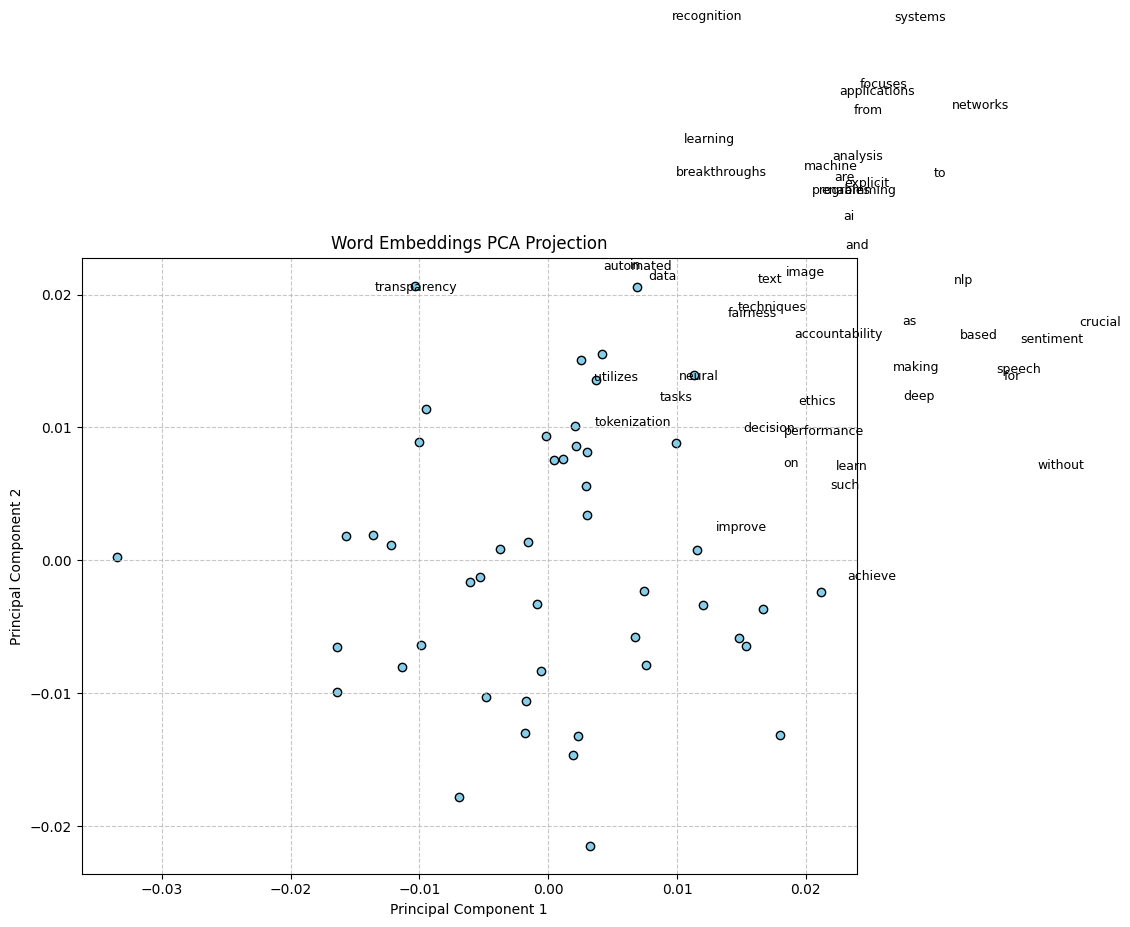

In [55]:
pca_transform = pca.fit_transform(X)

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_transform[:, 0], pca_transform[:, 1], c='skyblue', edgecolor='k')

# Annotate points with word labels
for i, word in enumerate(custom_model.wv.index_to_key):
    plt.text(pca_transform[i, 0] + 0.02, pca_transform[i, 1] + 0.02, word, fontsize=9)

plt.title("Word Embeddings PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()